___
# Atividade: Teoria da Probabilidade
___

## Aula 08 - Vinicius Bonelli Falco

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

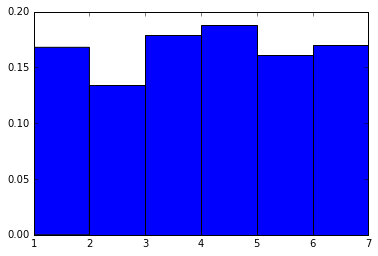

In [37]:
simulacao = []
for i in range(1,1001):
    simulacao.append(randint(1,7))
faixa_faces = range(1,8,1)
plt.figure()
plt.hist(simulacao, bins = faixa_faces, normed = 1)
plt.show()

    

A probabilidade de cair cada face é bem parecida, o que faz sentido visto que o dado é idôneo. Quando comparado a probabilidade teórica de cada face cair, que é de 1/6 percebemos uma certa diferença entre o real e o teórico, mas mesmo assim as probabilidades tendem ao teórico sempre. 

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [49]:
dado_1 = []
dado_2 = []
soma = 0
for i in range(1,1001):
    x = randint(1,7)
    y = randint(1,7)
    dado_1.append(x)
    dado_2.append(y)
    if (x + y) == 7:
        soma += 1
print(soma/1000)
print(1/6)
    

0.167
0.16666666666666666


Como os eventos são independentes as probabilidades são as mesmas, não importa se jogarmos os dois dados ao mesmo tempo ou os dois separados. As probabilidades reais sempre tendem a 1/6.

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [56]:
perdeu = 0
ganhou = 0
for i in range(1,10001):
    portas = [1,2,3]
    escolha = ['sim']
    pp = choice(portas)
    pe = choice(portas)
    if pp == pe:
        portas.remove(pp)
        pa = choice(portas)
    else:
        portas.remove(pp)
        portas.remove(pe)
        pa = choice(portas)
    tp = choice(escolha)
    if (tp == 'sim') and (pp == pe):
        perdeu += 1
    if (tp == 'sim') and (pp != pe):
        ganhou += 1
print(ganhou/10000)
print(perdeu/10000)


0.6676
0.3324
